# Vector Auto Regression

In [9]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Reading the file

In [10]:
data = pd.read_csv('merged_data_final.csv').rename({'Unnamed: 0':'fyear'}, axis = 1)
data.fyear = pd.to_datetime(data.fyear, format='%Y').dt.year
data.set_index(['gvkey','fyear'], inplace= True)
data.sort_index()

acominc     act     ap      at    ch  citotal  cshpri   dltt  \
gvkey  fyear                                                                 
2080   2003       2.0   100.0   15.0   280.0  15.0      3.0    11.0    0.0   
       2004       2.0   102.0   19.0   297.0   4.0      3.0    11.0   15.0   
       2005       2.0   103.0   19.0   308.0   7.0      7.0    11.0   19.0   
       2006       3.0   105.0   16.0   309.0   6.0      6.0    11.0   23.0   
       2007       1.0   111.0   26.0   310.0   3.0    -11.0    11.0   28.0   
...               ...     ...    ...     ...   ...      ...     ...    ...   
271841 2015       0.0  1090.0  105.0  1707.0  20.0     18.0   183.0  275.0   
       2016       0.0  1045.0   87.0  1601.0   9.0   -358.0   181.0  200.0   
       2017       0.0   523.0   77.0   868.0   8.0   -257.0    13.0  161.0   
       2018       0.0   438.0   60.0   652.0   8.0   -109.0    20.0  139.0   
       2019       0.0   450.0   52.0   631.0   3.0     -7.0    34.0   36.0   

              dvt   ebit  ...     pi  txpd  prev_ni  prev2_ni  prev3_ni  \
gvkey  fyear              ...                                             
2080   2003   9.0    1.0  ...    4.0  -4.0     -1.0       6.0      -3.0   
       2004   9.0    3.0  ...   10.0   1.0      8.0      -1.0       6.0   
       2005   9.0    6.0  ...    9.0   1.0      7.0       8.0      -1.0   
       2006   9.0   -2.0  ...    6.0   3.0      5.0       7.0       8.0   
       2007   9.0  -14.0  ...  -14.0   1.0    -10.0       5.0       7.0   
...           ...    ...  ...    ...   ...      ...       ...       ...   
271841 2015   4.0   29.0  ...   19.0   1.0     18.0     -17.0     367.0   
       2016   0.0 -130.0  ... -155.0   3.0   -358.0      18.0     -17.0   
       2017   0.0 -160.0  ... -294.0   0.0   -257.0    -358.0      18.0   
       2018   0.0  -33.0  ... -115.0   0.0   -109.0    -257.0    -358.0   
       2019   0.0    3.0  ...  -16.0   0.0     -7.0    -109.0    -257.0   

                t90ret     b5ret    cpiret    SNP500  SNP500_CD  
gvkey  fyear                                                     
2080   2003   0.011604  0.028316  0.018794  0.024097   0.029007  
       2004   0.013080  0.023355  0.032557  0.006291   0.016300  
       2005   0.030790  0.006416  0.034156  0.005029   0.007722  
       2006   0.048354  0.027717  0.025408  0.009365  -0.007227  
       2007   0.050863  0.101754  0.040814  0.001886  -0.036031  
...                ...       ...       ...       ...        ...  
271841 2015   0.000611  0.018853  0.007295  0.002206  -0.003172  
       2016   0.003544  0.012927  0.020746  0.013098   0.015921  
       2017   0.008854  0.012505  0.021091  0.014629   0.010513  
       2018   0.018767  0.015308  0.019103 -0.010765  -0.037177  
       2019   0.022608  0.062899  0.022850  0.016309   0.017660  

[2017 rows x 33 columns]

In [11]:
data.columns

Index(['acominc', 'act', 'ap', 'at', 'ch', 'citotal', 'cshpri', 'dltt', 'dvt',
       'ebit', 'ebitda', 'gp', 'icapt', 'invt', 'lt', 'opeps', 'revt', 'seq',
       'txdi', 'txp', 'txt', 'sic', 'ni', 'pi', 'txpd', 'prev_ni', 'prev2_ni',
       'prev3_ni', 't90ret', 'b5ret', 'cpiret', 'SNP500', 'SNP500_CD'],
      dtype='object')

## MARS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pyearth

In [13]:
X = data.drop(['ni'], axis = 1)
# X = data.drop(['ni','gvkey'], axis = 1)
y = data['ni']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
r2 = {}
for degree in range(4):
    mars = pyearth.Earth(max_terms=500, max_degree= degree) # note, terms in brackets are the hyperparameters 
    mars.fit_transform(X_train, y_train)
    r2[degree] = mars.score(X_test,y_test)

In [15]:
pd.Series(r2)

0   -0.001319
1   -2.516886
2   -0.209239
3   -2.164816
dtype: float64

Conclusion: MARS is shitty.
Needs more work

## PCA

In [26]:
data

,,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,prev_ni,prev2_ni,prev3_ni,t90ret,b5ret,cpiret,SNP500,SNP500_CD
gvkey,fyear,,,,,,,,,,,,,,,,,,,,,
2080,2003,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,1.0,...,4.0,-4.0,-1.0,6.0,-3.0,0.011604,0.028316,0.018794,0.024097,0.029007
2113,2003,0.0,6.0,1.0,6.0,0.0,-1.0,1.0,0.0,0.0,-2.0,...,-2.0,0.0,-1.0,0.0,1.0,0.011604,0.028316,0.018794,0.024097,0.029007
2444,2003,-73.0,1715.0,321.0,3602.0,345.0,143.0,91.0,583.0,45.0,246.0,...,201.0,85.0,135.0,78.0,81.0,0.011604,0.028316,0.018794,0.024097,0.029007
3622,2003,-1.0,32.0,4.0,57.0,0.0,1.0,9.0,30.0,0.0,8.0,...,2.0,-2.0,2.0,27.0,-74.0,0.011604,0.028316,0.018794,0.024097,0.029007
3647,2003,0.0,121.0,19.0,218.0,14.0,-9.0,11.0,76.0,0.0,20.0,...,-3.0,-2.0,-25.0,-4.0,-9.0,0.011604,0.028316,0.018794,0.024097,0.029007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142546,2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,24.0,4.0,19.0,28.0,28.0,0.006920,0.073770,0.013621,0.013940,0.010226
175319,2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-184.0,116.0,-76.0,600.0,553.0,0.006920,0.073770,0.013621,0.013940,0.010226
178015,2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,897.0,305.0,645.0,483.0,258.0,0.006920,0.073770,0.013621,0.013940,0.010226


In [28]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

pca_data_input = sscaler.fit_transform(data)
pca_data_input = pd.DataFrame(pca_data_input, columns = data.columns)
pca_data_input['ni'] = data['ni'].reset_index(drop = True)

# pca_data_input = sscaler.fit_transform(data[['ni']+result])
# pca_data_input = pd.DataFrame(pca_data_input, columns = data[['ni']+result].columns)
pca_data_input

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,prev_ni,prev2_ni,prev3_ni,t90ret,b5ret,cpiret,SNP500,SNP500_CD
0,0.152194,-0.279663,-0.224128,-0.261983,-0.300329,-0.171139,-0.295861,-0.452703,-0.227073,-0.338323,...,-0.242714,-0.325854,-0.196017,-0.173769,-0.191644,-0.114889,-0.200773,-0.163991,1.164385,0.939109
1,0.149513,-0.296933,-0.231006,-0.279246,-0.310815,-0.176216,-0.319130,-0.452703,-0.271733,-0.341672,...,-0.249024,-0.309737,-0.196017,-0.182284,-0.185265,-0.114889,-0.200773,-0.163991,1.164385,0.939109
2,0.051677,0.017039,-0.073789,-0.052691,-0.069638,0.006537,-0.109707,-0.060235,-0.048436,-0.064802,...,-0.035563,0.032749,-0.012448,-0.071586,-0.057673,-0.114889,-0.200773,-0.163991,1.164385,0.939109
3,0.148173,-0.292156,-0.229532,-0.276033,-0.310815,-0.173677,-0.300515,-0.432507,-0.271733,-0.330508,...,-0.244818,-0.317795,-0.191967,-0.143966,-0.304882,-0.114889,-0.200773,-0.163991,1.164385,0.939109
4,0.149513,-0.275805,-0.222163,-0.265889,-0.301028,-0.186369,-0.295861,-0.401541,-0.271733,-0.317111,...,-0.250075,-0.317795,-0.228411,-0.187961,-0.201214,-0.114889,-0.200773,-0.163991,1.164385,0.939109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.146833,-0.283338,-0.228549,-0.272127,-0.289144,-0.149564,-0.244669,-0.452703,-0.207225,-0.311529,...,-0.221684,-0.293620,-0.169021,-0.142546,-0.142202,-0.420964,0.941042,-0.694505,0.447588,0.200204
2013,-0.610391,0.328072,0.234259,0.205365,0.324634,-0.206674,0.497621,2.306692,0.785206,0.580483,...,-0.440402,0.157656,-0.297249,0.669241,0.695120,-0.420964,0.941042,-0.694505,0.447588,0.200204
2014,-0.152036,0.033941,-0.192684,-0.072915,0.453262,0.633480,-0.018957,-0.041385,-0.271733,0.653049,...,0.696301,0.919185,0.675935,0.503194,0.224625,-0.420964,0.941042,-0.694505,0.447588,0.200204
2015,0.149513,-0.257985,-0.221671,-0.245918,-0.276561,-0.154641,-0.244669,-0.376633,-0.271733,-0.305947,...,-0.225890,-0.285561,-0.173070,-0.153900,-0.175695,-0.420964,0.941042,-0.694505,0.447588,0.200204


In [29]:
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(pca_data_input.drop('ni',axis=1))

num_components = 6

print(f'\n Explanied Variance is ≈{round(pca.explained_variance_ratio_.cumsum()[num_components-1], 2)}% from the first {num_components}/{transformed.shape[1]} predictors itself!')
print(pca.explained_variance_ratio_.cumsum()[:num_components])

pca_data = pd.DataFrame(transformed[:,:num_components],
                    columns=[f'prin{i+1}' for i in range(num_components)])
pca_data['ni'] = pca_data_input['ni']
pca_data


 Explanied Variance is ≈0.81% from the first 6/32 predictors itself!
[0.4741783  0.60103236 0.68342959 0.73025505 0.77319917 0.81010872]


,prin1,prin2,prin3,prin4,prin5,prin6,ni
0,-1.369826,0.050527,-1.307140,0.105254,0.088509,0.161604,8.0
1,-1.434320,0.046710,-1.306641,0.101623,0.113094,0.214082,0.0
2,-0.264975,0.033467,-1.311814,0.115428,-0.007774,-0.277869,269.0
3,-1.418023,0.057796,-1.311349,0.102161,0.114049,0.330003,3.0
4,-1.374076,0.072674,-1.309407,0.100390,0.133741,0.339243,7.0
...,...,...,...,...,...,...,...
2012,-1.344799,0.025942,-0.010190,-0.730185,-0.194611,-0.458394,29.0
2013,1.477321,0.183324,-0.094286,-0.791344,-0.671003,1.132100,77.0
2014,1.060076,-1.008578,-0.062755,-0.764978,0.245098,0.295548,588.0
2015,-1.254376,0.056870,-0.014478,-0.738487,-0.108717,-0.090492,8.0


In [33]:
pca_data.index = data.index
pca_data

,,prin1,prin2,prin3,prin4,prin5,prin6,ni
gvkey,fyear,,,,,,,
2080,2003,-1.369826,0.050527,-1.307140,0.105254,0.088509,0.161604,8.0
2113,2003,-1.434320,0.046710,-1.306641,0.101623,0.113094,0.214082,0.0
2444,2003,-0.264975,0.033467,-1.311814,0.115428,-0.007774,-0.277869,269.0
3622,2003,-1.418023,0.057796,-1.311349,0.102161,0.114049,0.330003,3.0
3647,2003,-1.374076,0.072674,-1.309407,0.100390,0.133741,0.339243,7.0
...,...,...,...,...,...,...,...,...
142546,2020,-1.344799,0.025942,-0.010190,-0.730185,-0.194611,-0.458394,29.0
175319,2020,1.477321,0.183324,-0.094286,-0.791344,-0.671003,1.132100,77.0
178015,2020,1.060076,-1.008578,-0.062755,-0.764978,0.245098,0.295548,588.0


,prin1,prin2,prin3,prin4,prin5,prin6,prin7,prin8,prin9,prin10,...,prin23,prin24,prin25,prin26,prin27,prin28,prin29,prin30,prin31,prin32
acominc,-0.45,-0.78,0.02,-0.01,0.13,-0.06,0.08,-0.09,0.10,0.02,...,-0.02,0.05,0.01,0.03,-0.01,-0.00,-0.00,0.00,-0.00,-0.0
act,0.91,0.34,0.01,0.02,-0.10,-0.07,-0.02,0.03,0.00,-0.12,...,-0.06,-0.01,0.04,0.06,0.01,-0.03,0.05,-0.00,0.00,-0.0
ap,0.79,0.45,0.01,0.02,-0.17,-0.03,-0.19,-0.06,-0.10,-0.06,...,-0.05,-0.00,-0.04,-0.04,0.04,0.00,-0.00,-0.00,-0.00,0.0
at,0.91,0.33,0.00,0.02,-0.13,0.00,-0.10,-0.03,-0.15,-0.00,...,0.02,0.02,0.00,0.01,-0.04,-0.00,-0.00,0.00,0.00,-0.0
ch,0.87,0.34,0.01,0.00,-0.10,0.02,-0.04,0.00,0.05,-0.03,...,0.10,0.09,0.00,-0.02,0.02,0.01,-0.00,-0.00,-0.00,0.0
citotal,0.53,-0.67,-0.04,0.02,-0.19,-0.03,-0.30,-0.26,0.12,0.09,...,0.04,-0.11,0.06,-0.04,-0.00,0.00,0.00,-0.00,0.00,0.0
cshpri,0.70,0.04,-0.01,-0.01,0.08,-0.07,0.27,-0.00,0.43,-0.25,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.0
dltt,0.80,0.21,-0.01,-0.02,0.00,0.22,0.26,0.03,0.04,0.28,...,-0.03,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.0
dvt,0.76,-0.44,-0.03,-0.06,0.11,-0.13,0.22,0.11,0.02,-0.09,...,0.01,-0.02,0.01,0.01,0.01,0.00,-0.00,0.00,0.00,0.0
ebit,0.89,-0.39,-0.02,-0.02,0.06,-0.03,-0.04,0.00,0.05,-0.01,...,0.10,0.03,0.01,0.02,0.03,-0.04,-0.01,-0.00,-0.00,-0.0


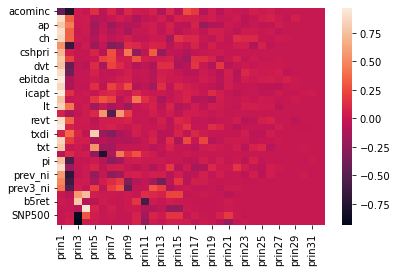

In [30]:
import seaborn as sns
# # cov_matrix = pd.DataFrame(pca.get_covariance(), index=pca.feature_names_in_, columns= pca.feature_names_in_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings = np.round(pd.DataFrame(loadings, columns = [f'prin{i+1}' for i in range(transformed.shape[1])], index= pca.feature_names_in_), 2)

sns.heatmap(loadings)
loadings

In [31]:
import statsmodels.api as sm
from patsy import dmatrices

from sklearn.model_selection import train_test_split
from typing import Union

from sklearn.metrics import r2_score

class OLS:
    def __init__(self, formula: str, data: pd.DataFrame):
        print(formula)
        self.y, self.X = dmatrices(formula, data=data.reset_index(), return_type='dataframe')
        self.val_split = None
        return
    
    def train(self, validation_split: Union[None,float] = None):
        self.val_split = validation_split
        if validation_split:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=validation_split, random_state=42)
            self.model = sm.OLS(self.y_train,self.X_train)
        else:
            self.model = sm.OLS(self.y, self.X)
        self.result = self.model.fit()
        return self.result.summary()

    def rmse(self, precision:int = 4):
        if self.val_split is not None:
            return np.round(np.sqrt(np.mean((np.array(self.y_test.T - self.result.predict(self.X_test)).flatten())**2)), precision)
        else:
            return np.round(np.sqrt(np.mean((np.array(self.y.T - self.result.predict(self.X)).flatten())**2)), precision)

    def r2_score(self, precision: int = 4):
        if self.val_split is not None:
            return round(r2_score(self.y_test, self.result.predict(self.X_test)), precision)
        else:
            return round(r2_score(self.y, self.result.predict(self.X)), precision)
        

In [32]:

model_pca = OLS(formula=f'ni ~ {"+".join(pca_data.drop("ni", axis = 1).columns)}', data=pca_data)
# print(model_pca.train())
print(model_pca.train(validation_split= 0.2))
print(f'Test Set R2 is:{model_pca.r2_score()}')
print(f'\nRMSE:{model_pca.rmse()}')

ni ~ prin1+prin2+prin3+prin4+prin5+prin6
                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     239.4
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.17e-218
Time:                        14:43:58   Log-Likelihood:                -12529.
No. Observations:                1613   AIC:                         2.507e+04
Df Residuals:                    1606   BIC:                         2.511e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

# Time Series

In [127]:
from statsmodels.tsa.arima.model import ARIMA

In [128]:
df

,prin1,prin2,prin3,prin4,prin5,prin6,ni
fyear,,,,,,,
2004,-1.369826,0.050527,-1.307140,0.105254,0.088509,0.161604,8.0
2005,-1.359066,0.011125,-0.413047,0.937688,0.161470,0.152963,7.0
2006,-1.354772,-0.035920,0.021917,1.755184,0.191983,0.163890,5.0
2007,-1.351869,-0.077971,0.892842,1.774890,0.142109,0.205851,-10.0
2008,-1.371548,-0.105475,2.735645,2.783354,0.116153,0.216727,-41.0
2009,-1.357040,0.014435,4.534107,-2.240935,-0.173209,0.189560,-23.0
2010,-1.428985,0.164853,-2.693071,0.567802,0.202285,0.029097,-3.0
2011,-1.404346,0.108560,-0.529124,-0.822782,-0.015922,0.145449,55.0
2012,-1.335688,-0.018536,0.976499,-0.041991,-0.030079,0.108721,26.0


                               SARIMAX Results                                
Dep. Variable:                     ni   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -71.294
Date:                Mon, 14 Feb 2022   AIC                            148.589
Time:                        16:03:14   BIC                            150.906
Sample:                             0   HQIC                           148.707
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1727      3.591     -0.048      0.962      -7.210       6.865
ma.L1          0.2640      3.623      0.073      0.942      -6.837       7.365
sigma2       434.1268    188.000      2.309      0.0

/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


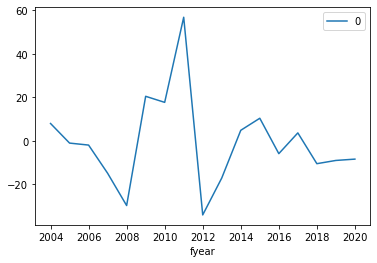

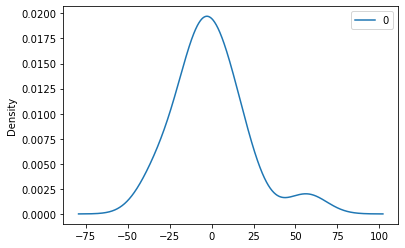

               0
count  17.000000
mean   -0.596814
std    20.922438
min   -33.976501
25%   -10.453755
50%    -1.910814
75%     8.000000
max    56.780027


In [179]:
# fit model
model = ARIMA(df.ni[:-1], order=(1,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [180]:
model_fit.predict(2022)

/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022   -11.556875
dtype: float64